# 課程重點:
    
    利用Keras 建立神經網路模型
    
    查看優化器的結果

# 範例目標:
    
    使用CIFAR-10圖庫, 看看完整神經網路

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os


Using TensorFlow backend.


In [2]:
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


In [3]:
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'


In [4]:
# 檢查Dataset 的描述與資訊
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

#   第二步：構建網絡層
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

W0723 21:23:34.908279 10776 deprecation_wrapper.py:119] From C:\Users\Sims_Home\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 21:23:34.912274 10776 deprecation_wrapper.py:119] From C:\Users\Sims_Home\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 21:23:34.923257 10776 deprecation_wrapper.py:119] From C:\Users\Sims_Home\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0723 21:23:34.963120 10776 deprecation_wrapper.py:119] From C:\Users\Sims_Home\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0723 21:23:34.967110 10776 deprecation_wrapper.py:119] From C:

In [6]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1250858


In [7]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [8]:
#第三步編譯
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


W0723 21:23:35.102751 10776 deprecation_wrapper.py:119] From C:\Users\Sims_Home\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0723 21:23:35.136684 10776 deprecation_wrapper.py:119] From C:\Users\Sims_Home\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
# 資料正規化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [10]:
# 是否要做資料處理
if not data_augmentation:
    print('Not using data augmentation.')
    history=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    print('')
        
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)
    history=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)   

'''
   第四步：訓練
   .fit的一些參數
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   shuffle：是否把數據隨機打亂之後再進行訓練
   validation_split：拿出百分之多少用來做交叉驗證
   verbose：屏顯模式 - 0：不輸出, 1：輸出進度, 2：輸出每次的訓練結果
''' 
    

Using real-time data augmentation.



W0723 21:23:36.256732 10776 deprecation.py:323] From C:\Users\Sims_Home\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 166s 3ms/step - loss: 1.5255 - acc: 0.4420 - val_loss: 1.1459 - val_acc: 0.5862
Epoch 2/20
50000/50000 [==============================] - 156s 3ms/step - loss: 1.1187 - acc: 0.6027 - val_loss: 0.9259 - val_acc: 0.6707
Epoch 3/20
50000/50000 [==============================] - 164s 3ms/step - loss: 0.9656 - acc: 0.6616 - val_loss: 0.8253 - val_acc: 0.7135
Epoch 4/20
50000/50000 [==============================] - 162s 3ms/step - loss: 0.8672 - acc: 0.6955 - val_loss: 0.7770 - val_acc: 0.7296
Epoch 5/20
50000/50000 [==============================] - 164s 3ms/step - loss: 0.8074 - acc: 0.7170 - val_loss: 0.7698 - val_acc: 0.7374
Epoch 6/20
50000/50000 [==============================] - 163s 3ms/step - loss: 0.7508 - acc: 0.7344 - val_loss: 0.7783 - val_acc: 0.7334
Epoch 7/20
50000/50000 [==============================] - 169s 3ms/step - loss: 0.7122 - acc: 0.7511 - val_loss: 0.7312 - 

'\n   第四步：訓練\n   .fit的一些參數\n   batch_size：對總的樣本數進行分組，每組包含的樣本數量\n   epochs ：訓練次數\n   shuffle：是否把數據隨機打亂之後再進行訓練\n   validation_split：拿出百分之多少用來做交叉驗證\n   verbose：屏顯模式 - 0：不輸出, 1：輸出進度, 2：輸出每次的訓練結果\n'

In [11]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

#    第六步：輸出
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at C:\Users\Sims_Home\Desktop\python\2nd-ML100Days\homework\saved_models\keras_cifar10_trained_model.h5 
10000/10000 [==============================] - 6s 570us/step
Test loss: 0.6705057404994964
Test accuracy: 0.7832


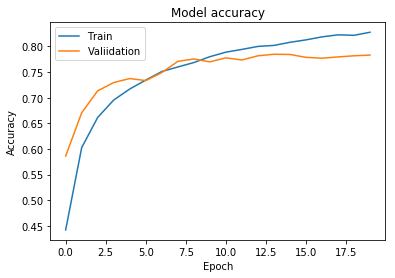

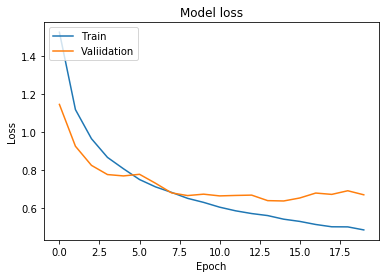

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.show()

## 參考資料

### 延伸閱讀
An overview of gradient descent optimization algorithms

https://arxiv.org/pdf/1609.04747.pdf



在很多機器學習和深度學習的應用中，我們發現用的最多的優化器是Adam，為什麼呢？

下面是TensorFlow中的優化器，https://www.tensorflow.org/api_guides/python/train



在keras中也有SGD，RMSprop，Adagrad，Adadelta，Adam等：https://keras.io/optimizers/



我們可以發現除了常見的梯度下降，還有Adadelta，Adagrad，RMSProp 等幾種優化器，都是什麼呢，又該怎麼選擇呢？https://blog.csdn.net/qq_35860352/article/details/80772142



Sebastian Ruder的這篇論文中給出了常用優化器的比較 https://arxiv.org/pdf/1609.04747.pdf

### 延伸閱讀:優化器是編譯Keras模型所需的兩個參數之一
from keras import optimizers 

model = Sequential() model.add(Dense(64, kernel_initializer='uniform', input_shape=(10,))) 

model.add(Activation('softmax’)) 

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) 

model.compile(loss='mean_squared_error', optimizer=sgd) 

您可以在傳遞優化器之前將其實例化model.compile()，如上例所示，或者您可以通過其名稱來調用它。

在後一種情況下，將使用優化程序的默認參數。

### pass optimizer by name: default parameters will be used 

model.compile(loss='mean_squared_error', optimizer='sgd') 



所有Keras優化器通用的參數

的參數clipnorm和clipvalue可以與所有優化可以用來控制限幅梯度
![](https://ai100-fileentity.cupoy.com/2nd/homework/D76/1562826676216/large)

### 延伸閱讀:二階優化算法
https://web.stanford.edu/class/msande311/lecture13.pdf

二階優化算法使用了二階導數(也叫做Hessian方法 )來最小化或最大化損失函數。由於二階導數的計算成本很高，所以這種方法並沒有廣泛使用。
![](https://ai100-fileentity.cupoy.com/2nd/homework/D76/1562826714648/large)

### 延伸閱讀:自適應的算法
如果需要更快的收斂，或者是訓練更深更複雜的神經網絡，需要用一種自適應的算法。

http://www.redcedartech.com/pdfs/Select_Optimization_Method.pdf 
![](https://ai100-fileentity.cupoy.com/2nd/homework/D76/1562826755048/large)

# 其他
[雞雞與兔兔的工程世界](https://medium.com/%E9%9B%9E%E9%9B%9E%E8%88%87%E5%85%94%E5%85%94%E7%9A%84%E5%B7%A5%E7%A8%8B%E4%B8%96%E7%95%8C/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92ml-note-sgd-momentum-adagrad-adam-optimizer-f20568c968db)